In [1]:
import pandas as pd 
import numpy as np 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import json
 ##The warnings filter controls whether warnings are ignored, displayed, or turned into errors (raising an exception).

C:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
db=sqlite3.connect('travel.sqlite')
cur=db.cursor()

In [3]:
table=pd.read_sql("""select * from sqlite_master where type='table';""",db)
pd.DataFrame(table)

,type,name,tbl_name,rootpage,sql
0,table,aircrafts_data,aircrafts_data,2,CREATE TABLE aircrafts_data (\r\n aircraft_...
1,table,airports_data,airports_data,3,CREATE TABLE airports_data (\r\n airport_co...
2,table,boarding_passes,boarding_passes,4,CREATE TABLE boarding_passes (\r\n ticket_n...
3,table,bookings,bookings,5,CREATE TABLE bookings (\r\n book_ref charac...
4,table,flights,flights,6,CREATE TABLE flights (\r\n flight_id intege...
5,table,seats,seats,7,CREATE TABLE seats (\r\n aircraft_code char...
6,table,ticket_flights,ticket_flights,8,CREATE TABLE ticket_flights (\r\n ticket_no...
7,table,tickets,tickets,9,CREATE TABLE tickets (\r\n ticket_no charac...


In [4]:
aircrafts_data=pd.read_sql_query("select * from aircrafts_data",db)
aircrafts_data['model']=aircrafts_data['model'].apply(lambda x: json.loads(x)['en'])
pd.DataFrame(aircrafts_data)

,aircraft_code,model,range
0,773,Boeing 777-300,11100
1,763,Boeing 767-300,7900
2,SU9,Sukhoi Superjet-100,3000
3,320,Airbus A320-200,5700
4,321,Airbus A321-200,5600
5,319,Airbus A319-100,6700
6,733,Boeing 737-300,4200
7,CN1,Cessna 208 Caravan,1200
8,CR2,Bombardier CRJ-200,2700


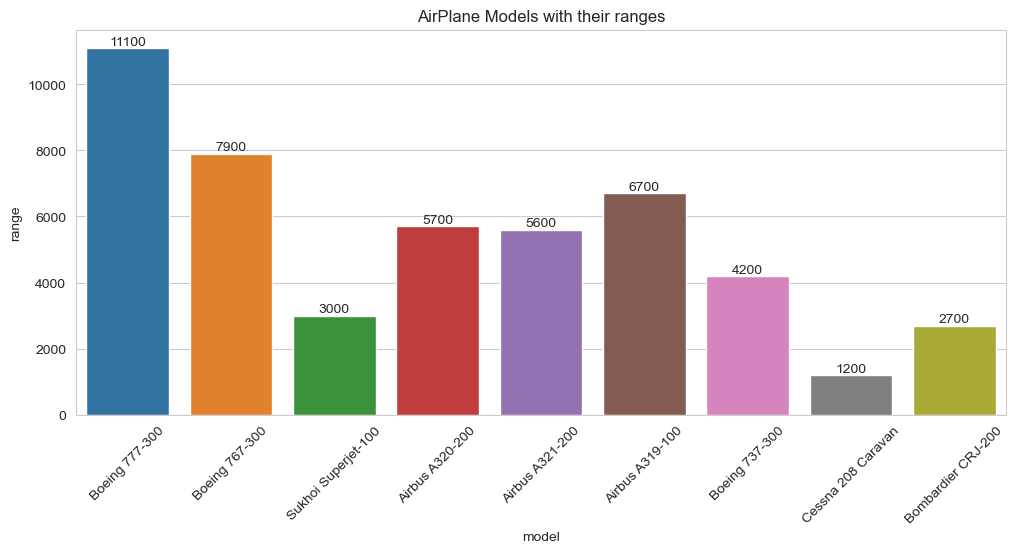

In [5]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
ax = sns.barplot(x='model',y='range', data=aircrafts_data)
for container in ax.containers:
    ax.bar_label(container)
plt.title('AirPlane Models with their ranges')
plt.xticks(rotation=45)
plt.show()

In [6]:
aircrafts_data.shape

(9, 3)

In [7]:
airports_data=pd.read_sql_query("select * from airports_data",db)
pd.DataFrame(airports_data)

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [8]:
boarding_passes=pd.read_sql_query("select * from boarding_passes",db)
pd.DataFrame(boarding_passes)

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [9]:
bookings=pd.read_sql_query("select * from bookings",db)
pd.DataFrame(bookings)

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [10]:
## here we are going to analyze the airlines data to find out the parameteres that is going to 
## maximize the revenue of the company 
## following steps that we are going to follow:
## 1.analyzing the revenue
## 2.checking revenue made by each flight having seats more than 100.

In [11]:
booking=pd.read_sql_query("select * from bookings",db)
pd.DataFrame(booking)
booking['book_date']=pd.to_datetime(booking['book_date'])
booking['book_date']

0        2017-07-05 03:12:00+03:00
1        2017-07-14 09:02:00+03:00
2        2017-08-15 14:27:00+03:00
3        2017-08-10 13:28:00+03:00
4        2017-08-07 21:40:00+03:00
                    ...           
262783   2017-07-17 07:23:00+03:00
262784   2017-08-08 05:55:00+03:00
262785   2017-07-20 20:42:00+03:00
262786   2017-08-08 04:45:00+03:00
262787   2017-07-01 22:12:00+03:00
Name: book_date, Length: 262788, dtype: datetime64[ns, pytz.FixedOffset(180)]

In [12]:
booking['Date']=booking['book_date'].dt.date
booking

,book_ref,book_date,total_amount,Date
0,00000F,2017-07-05 03:12:00+03:00,265700,2017-07-05
1,000012,2017-07-14 09:02:00+03:00,37900,2017-07-14
2,000068,2017-08-15 14:27:00+03:00,18100,2017-08-15
3,000181,2017-08-10 13:28:00+03:00,131800,2017-08-10
4,0002D8,2017-08-07 21:40:00+03:00,23600,2017-08-07
...,...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03:00,56000,2017-07-17
262784,FFFF2C,2017-08-08 05:55:00+03:00,10800,2017-08-08
262785,FFFF43,2017-07-20 20:42:00+03:00,78500,2017-07-20
262786,FFFFA8,2017-08-08 04:45:00+03:00,28800,2017-08-08


In [13]:
booking_amount=booking.groupby('Date')[['total_amount']].sum()
booking_amount

,total_amount
Date,
2017-06-21,441900
2017-06-22,775300
2017-06-23,1822000
2017-06-24,5977000
2017-06-25,15305400
2017-06-26,29049100
2017-06-27,54339900
2017-06-28,91256400
2017-06-29,152484000


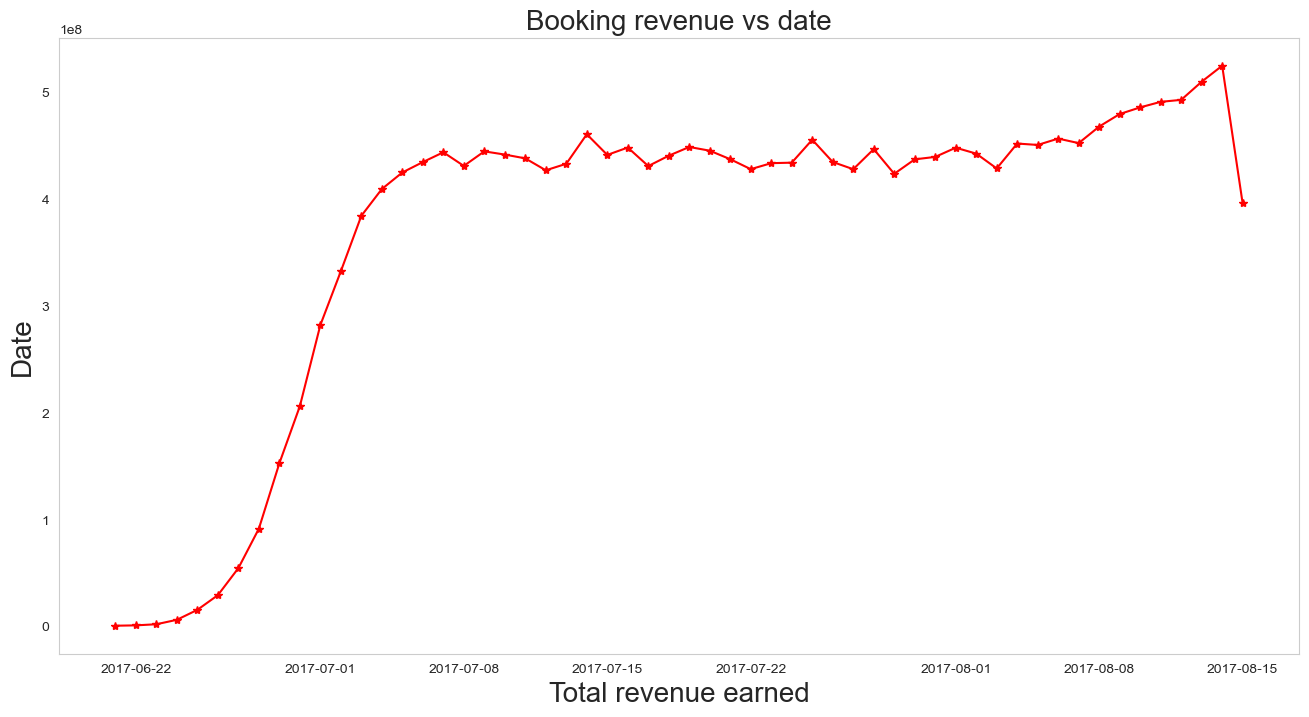

In [14]:
plt.figure(figsize=(16,8))
plt.plot(booking_amount.index,booking_amount['total_amount'],marker='*',color='red')
plt.title('Booking revenue vs date',fontsize="20")
plt.xlabel("Total revenue earned",fontsize="20")
plt.ylabel("Date",fontsize="20")
plt.grid()
plt.show()

In [15]:
Table1=pd.read_sql_query("""select a.aircraft_code,count(s.seat_no),a.revenue from(select f.aircraft_code,sum(tf.amount) as revenue from flights f inner
join ticket_flights tf on f.flight_id=tf.flight_id group by f.aircraft_code) as a inner join 
seats as s on s.aircraft_code=a.aircraft_code group by a.aircraft_code order by a.revenue desc""",db)
pd.DataFrame(Table1)

,aircraft_code,count(s.seat_no),revenue
0,SU9,97,5114484700
1,763,222,4371277100
2,773,402,3431205500
3,319,116,2706163100
4,CR2,50,1982760500
5,321,170,1638164100
6,733,130,1426552100
7,CN1,12,96373800


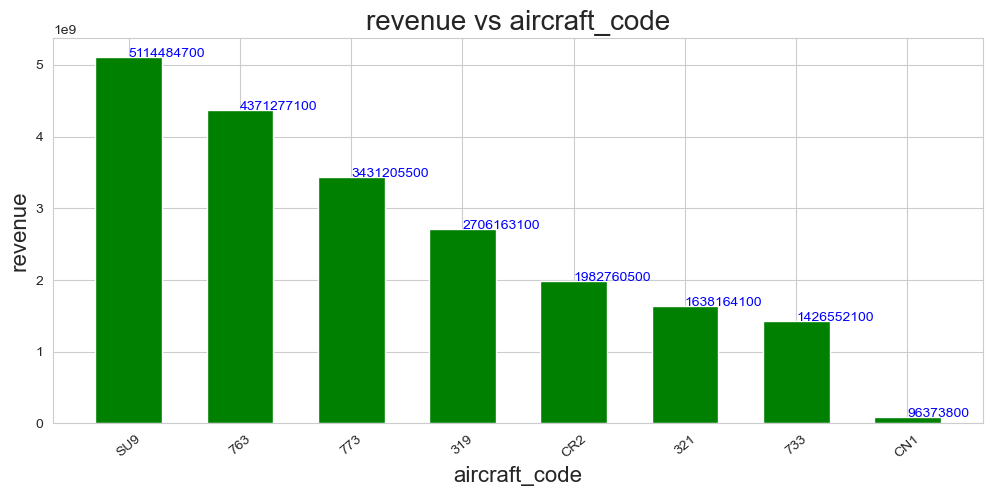

In [16]:
def addvalue(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],color='blue')
plt.figure(figsize=(12,5))
plt.bar(Table1['aircraft_code'],Table1['revenue'],width=0.6,color='green')
plt.title("revenue vs aircraft_code",fontsize="20")
plt.xlabel("aircraft_code",fontsize="16")
plt.ylabel("revenue",fontsize="16")
addvalue(Table1['aircraft_code'],Table1['revenue'])
plt.xticks(rotation='40')
plt.show()

In [22]:
table2=pd.read_sql_query("""SELECT t1.aircraft_code,t1.fare_conditions, t1.seat_no, t2.revenue,t2.fare_per_ticket,t2.average from (SELECT s.aircraft_code,s.fare_conditions,count(s.seat_no) as seat_no FROM seats s group by s.aircraft_code,s.fare_conditions)
as t1 inner join (select sum(tf.amount) as revenue,avg(tf.amount) as average,tf.fare_conditions, tf.amount as fare_per_ticket from ticket_flights as tf GROUP by tf.fare_conditions) as t2 on t1.fare_conditions=t2.fare_conditions
group by t1.aircraft_code,t1.fare_conditions""",db)
pd.DataFrame(table2)

,aircraft_code,fare_conditions,seat_no,revenue,fare_per_ticket,average
0,319,Business,20,5505179600,42100,51143.416139
1,319,Economy,96,14695684400,14000,15959.813335
2,320,Business,20,5505179600,42100,51143.416139
3,320,Economy,120,14695684400,14000,15959.813335
4,321,Business,28,5505179600,42100,51143.416139
5,321,Economy,142,14695684400,14000,15959.813335
6,733,Business,12,5505179600,42100,51143.416139
7,733,Economy,118,14695684400,14000,15959.813335
8,763,Business,30,5505179600,42100,51143.416139
9,763,Economy,192,14695684400,14000,15959.813335


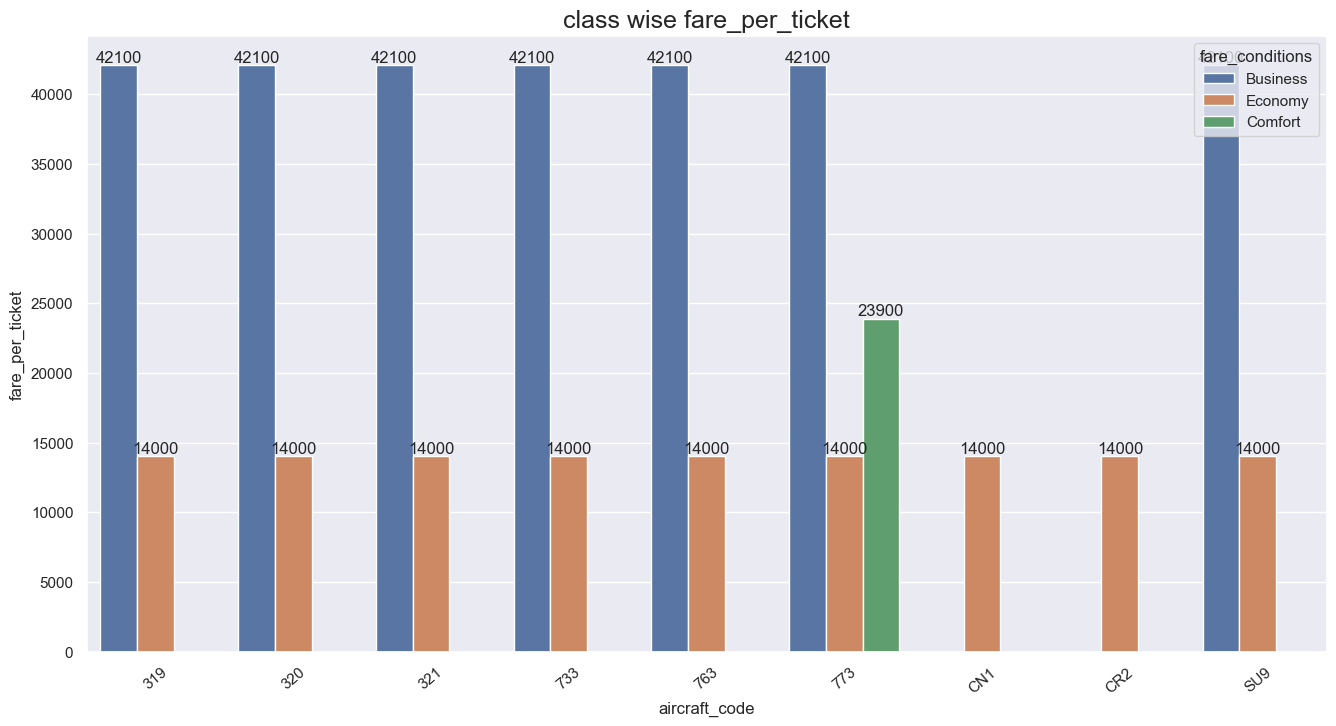

In [18]:
sns.set()
plt.figure(figsize=(16,8))
ax=sns.barplot(x='aircraft_code',y='fare_per_ticket',data=table2,hue='fare_conditions')
for container in ax.containers:
    ax.bar_label(container)
plt.title('class wise fare_per_ticket',fontsize='18')
plt.xticks(rotation='40')
plt.show()

In [36]:
occupancy=pd.read_sql_query("""select t1.aircraft_code,t1.total_seat as total_seats,avg(t2.booked_seats) as 
booked_seats, avg(t2.booked_seats)/avg(t1.total_seat) as occupancy_rate from (select s.aircraft_code,count(*) as total_seat
from seats as s group by s.aircraft_code) as t1 inner join (select count(bp.seat_no) as booked_seats,f.aircraft_code,
bp.flight_id from boarding_passes as bp inner join flights as f on bp.flight_id=f.flight_id group by f.aircraft_code,
f.flight_id) as t2 on t1.aircraft_code=t2.aircraft_code group by t1.aircraft_code""",db)
pd.DataFrame(occupancy)

,aircraft_code,total_seats,booked_seats,occupancy_rate
0,319,116,53.583181,0.461924
1,321,170,88.809231,0.522407
2,733,130,80.255462,0.617350
3,763,222,113.937294,0.513231
4,773,402,264.925806,0.659019
5,CN1,12,6.004431,0.500369
6,CR2,50,21.482847,0.429657
7,SU9,97,56.812113,0.585692


In [37]:
occupancy['inc_occupancy_rate']=occupancy['occupancy_rate'] + occupancy['occupancy_rate']*0.08
pd.DataFrame(occupancy)

,aircraft_code,total_seats,booked_seats,occupancy_rate,inc_occupancy_rate
0,319,116,53.583181,0.461924,0.498878
1,321,170,88.809231,0.522407,0.564200
2,733,130,80.255462,0.617350,0.666738
3,763,222,113.937294,0.513231,0.554290
4,773,402,264.925806,0.659019,0.711741
5,CN1,12,6.004431,0.500369,0.540399
6,CR2,50,21.482847,0.429657,0.464029
7,SU9,97,56.812113,0.585692,0.632547


In [39]:
pd.set_option("display.float_format",str)
occupancy['inc_turnover']=(Table1['revenue']/occupancy['occupancy_rate'])*occupancy['inc_occupancy_rate']
pd.DataFrame(occupancy)

,aircraft_code,total_seats,booked_seats,occupancy_rate,inc_occupancy_rate,inc_turnover
0,319,116,53.58318098720292,0.46192397402761143,0.49887789194982035,5523643476.000001
1,321,170,88.80923076923077,0.5224072398190045,0.5641998190045249,4720979268.0
2,733,130,80.25546218487395,0.617349709114415,0.6667376858435682,3705701940.0
3,763,222,113.93729372937294,0.5132310528350132,0.5542895370618143,2922656148.0
4,773,402,264.9258064516129,0.659019419033863,0.711740972556572,2141381340.0
5,CN1,12,6.004431314623338,0.5003692762186115,0.5403988183161004,1769217227.9999998
6,CR2,50,21.48284690220174,0.42965693804403476,0.46402949308755753,1540676268.0
7,SU9,97,56.81211267605634,0.5856918832583128,0.6325472339189778,104083704.0
